<a href="https://colab.research.google.com/github/julianayuri/ReconhecimentoPadroes/blob/main/RedesNeurais_Atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(test_split=0.2, seed=42, num_words=10000)


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8982,), (8982,), (2246,), (2246,))

In [ ]:
x_train[0:1], y_train[0:1]

(array([list([1, 39, 566, 11, 14, 841, 11, 29, 53, 617, 187, 193, 15, 14, 134, 533, 15, 53, 175, 3758, 948, 15, 14, 4313, 279, 15, 39, 4074, 11, 14, 3814, 11, 123, 248, 867, 377, 1471, 81, 2, 64, 187, 6164, 2116, 617, 79, 335, 7, 48, 14, 187, 6164, 4656, 7, 105, 324, 27, 69, 12, 18, 730, 1698, 5, 4, 134, 248, 867, 377, 171, 2, 75, 40, 251, 18, 79, 5, 175, 324, 27, 4, 867, 377, 171, 17, 12])],
       dtype=object),
 array([3]))

In [ ]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i, "?") for i in sentence]
    )
decode_words(reuters.get_word_index(), x_train[0])

'the an brazil vs reuter 68 vs 2 lt index countries 18 000 reuter all number 000 lt oper site consumption 000 reuter considerably reserves 000 an 784 vs reuter holiday vs some 100 hit our forward up of share countries 624 writedown index tonnes income a but reuter countries 624 627 a exchange half be 9 dlrs on bond 07 said in all 100 hit our japanese of two as before on tonnes said oper half be in hit our japanese pct dlrs'

In [ ]:
from sklearn.preprocessing import label_binarize

def encode_labels( y):
    labels = list(set(y))
    return label_binarize(y, classes=labels)*2-1



In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape 


((8982, 10000), (8982, 46), (2246, 10000), (2246, 46))

In [ ]:
y_train[0:1]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(94, activation="relu"),
    #layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])    


In [ ]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=400, validation_data=(x_val, y_val))

Epoch 1/20
20/20 [==============================] - 2s 76ms/step - loss: 2.2961 - accuracy: 0.5743 - val_loss: 1.6244 - val_accuracy: 0.6770
Epoch 2/20
20/20 [==============================] - 2s 76ms/step - loss: 1.2892 - accuracy: 0.7335 - val_loss: 1.2530 - val_accuracy: 0.7280
Epoch 3/20
20/20 [==============================] - 2s 94ms/step - loss: 0.9472 - accuracy: 0.8049 - val_loss: 1.0829 - val_accuracy: 0.7600
Epoch 4/20
20/20 [==============================] - 2s 119ms/step - loss: 0.7358 - accuracy: 0.8505 - val_loss: 0.9935 - val_accuracy: 0.7790
Epoch 5/20
20/20 [==============================] - 3s 134ms/step - loss: 0.5849 - accuracy: 0.8817 - val_loss: 0.9407 - val_accuracy: 0.7900
Epoch 6/20
20/20 [==============================] - 1s 66ms/step - loss: 0.4735 - accuracy: 0.9072 - val_loss: 0.9070 - val_accuracy: 0.7940
Epoch 7/20
20/20 [==============================] - 1s 50ms/step - loss: 0.3907 - accuracy: 0.9242 - val_loss: 0.8854 - val_accuracy: 0.7980
Epoch 8/20


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

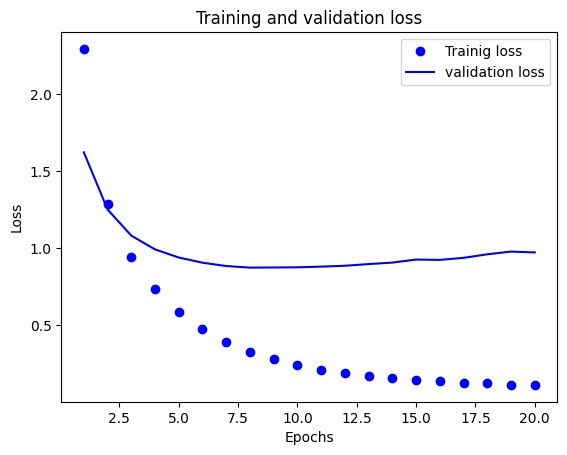

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

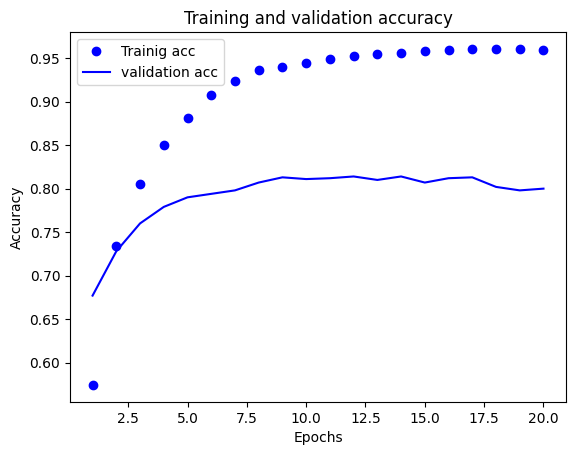

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()   


In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=9, batch_size=512,
                    validation_data=(x_val, y_val))
     

Epoch 1/9
16/16 [==============================] - 2s 90ms/step - loss: 0.1117 - accuracy: 0.9595 - val_loss: 0.9848 - val_accuracy: 0.7990
Epoch 2/9
16/16 [==============================] - 2s 98ms/step - loss: 0.1014 - accuracy: 0.9624 - val_loss: 0.9890 - val_accuracy: 0.7980
Epoch 3/9
16/16 [==============================] - 2s 103ms/step - loss: 0.0981 - accuracy: 0.9624 - val_loss: 1.0127 - val_accuracy: 0.8060
Epoch 4/9
16/16 [==============================] - 1s 65ms/step - loss: 0.0950 - accuracy: 0.9635 - val_loss: 1.0149 - val_accuracy: 0.8020
Epoch 5/9
16/16 [==============================] - 1s 63ms/step - loss: 0.0931 - accuracy: 0.9615 - val_loss: 1.0300 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 1s 63ms/step - loss: 0.0921 - accuracy: 0.9622 - val_loss: 1.0471 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 1s 63ms/step - loss: 0.0900 - accuracy: 0.9613 - val_loss: 1.0502 - val_accuracy: 0.8000
Epoch 8/9
16/16 [==

In [ ]:
y_pred = model.predict(x_test)
np.argmax(y_pred[0])

71/71 [==============================] - 0s 3ms/step


1

In [ ]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.0195 - accuracy: 0.7983
